In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing,Holt
from sklearn.linear_model import LinearRegression


import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("gold_monthly_csv.csv")
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [3]:
df.shape

(847, 2)

In [4]:
print(f"date range of gold price available from - {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

date range of gold price available from - 1950-01 to 2020-07


In [5]:
date = pd.date_range (start = '1/1/1950', end = '8/1/2020', freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [6]:
df['month'] = date
df.drop('Date', axis = 1, inplace = True)
df = df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


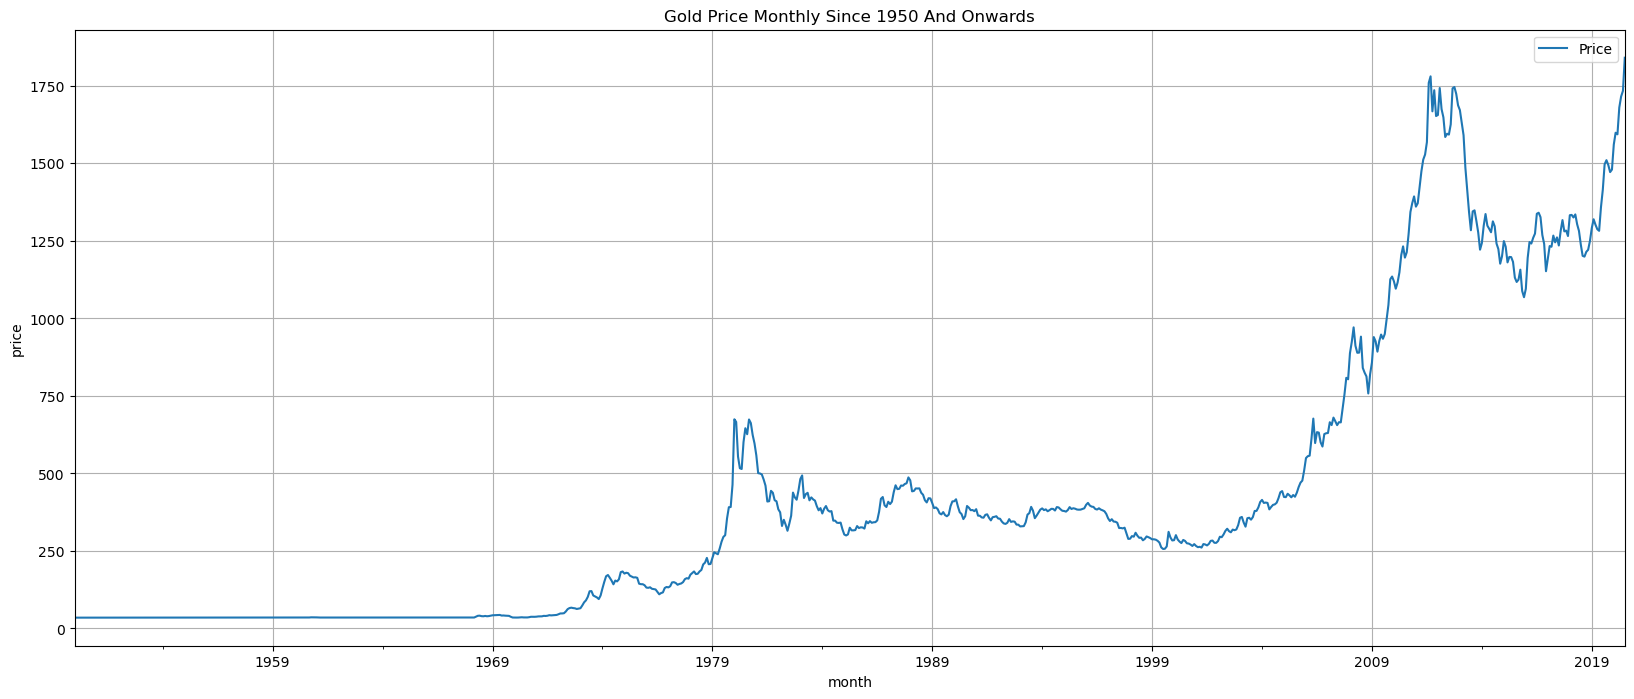

In [7]:
df.plot(figsize=(20,8))
plt.title("Gold Price Monthly Since 1950 And Onwards")
plt.xlabel("month")
plt.ylabel("price")
plt.grid();

In [8]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


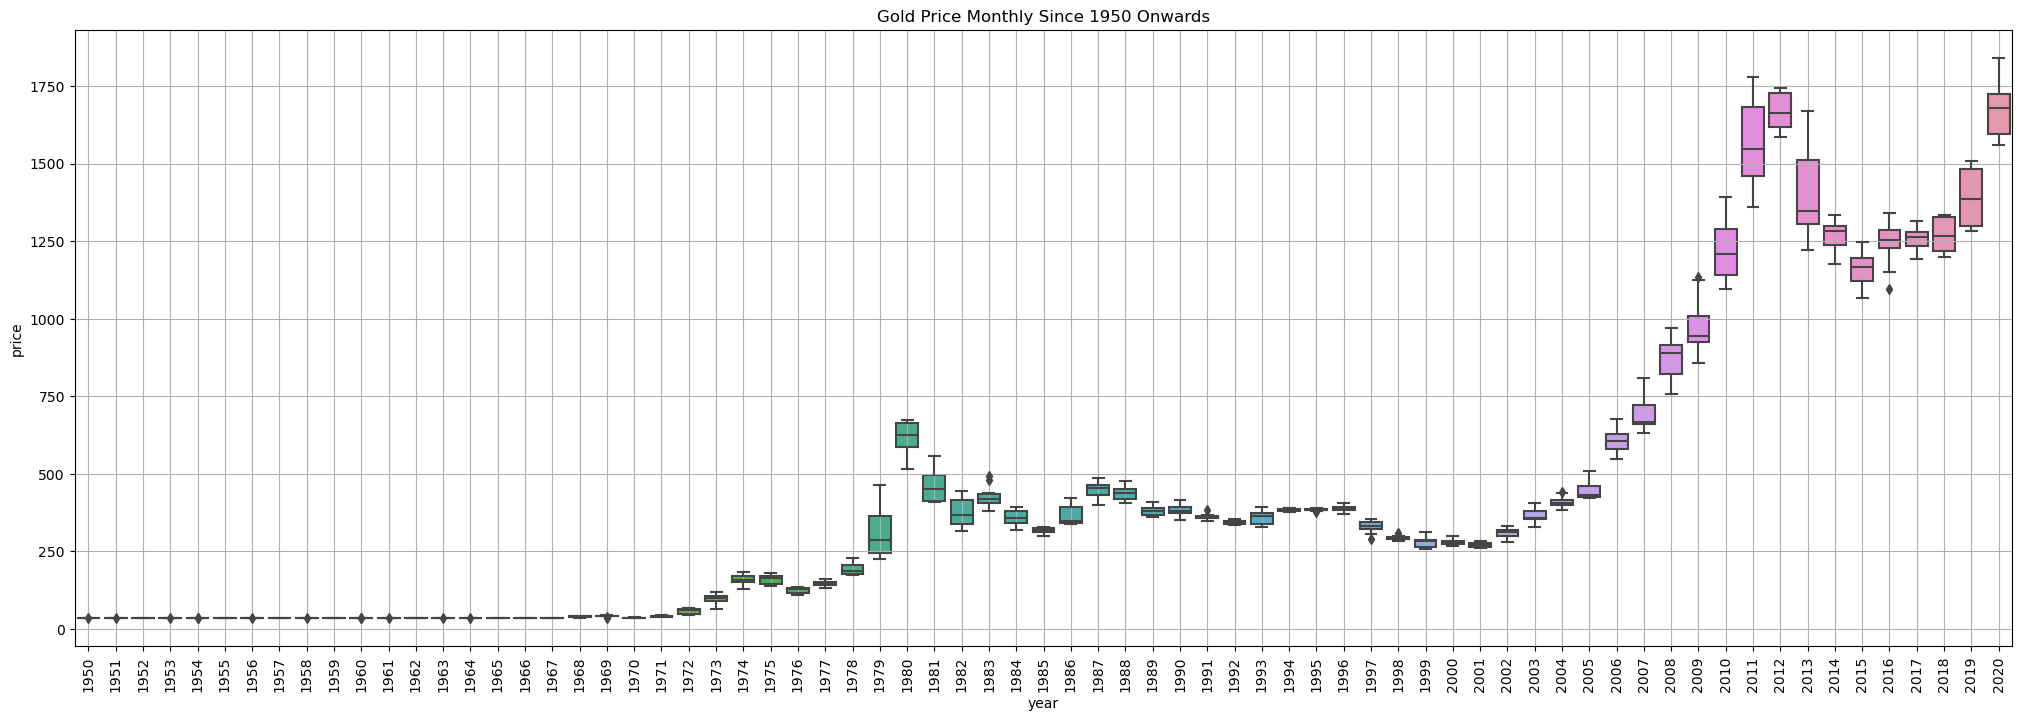

In [9]:
_, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x = df.index.year, y = df.values[:,0], ax=ax)
plt.title("Gold Price Monthly Since 1950 Onwards")
plt.xlabel('year')
plt.ylabel('price')
plt.xticks(rotation = 90)
plt.grid();

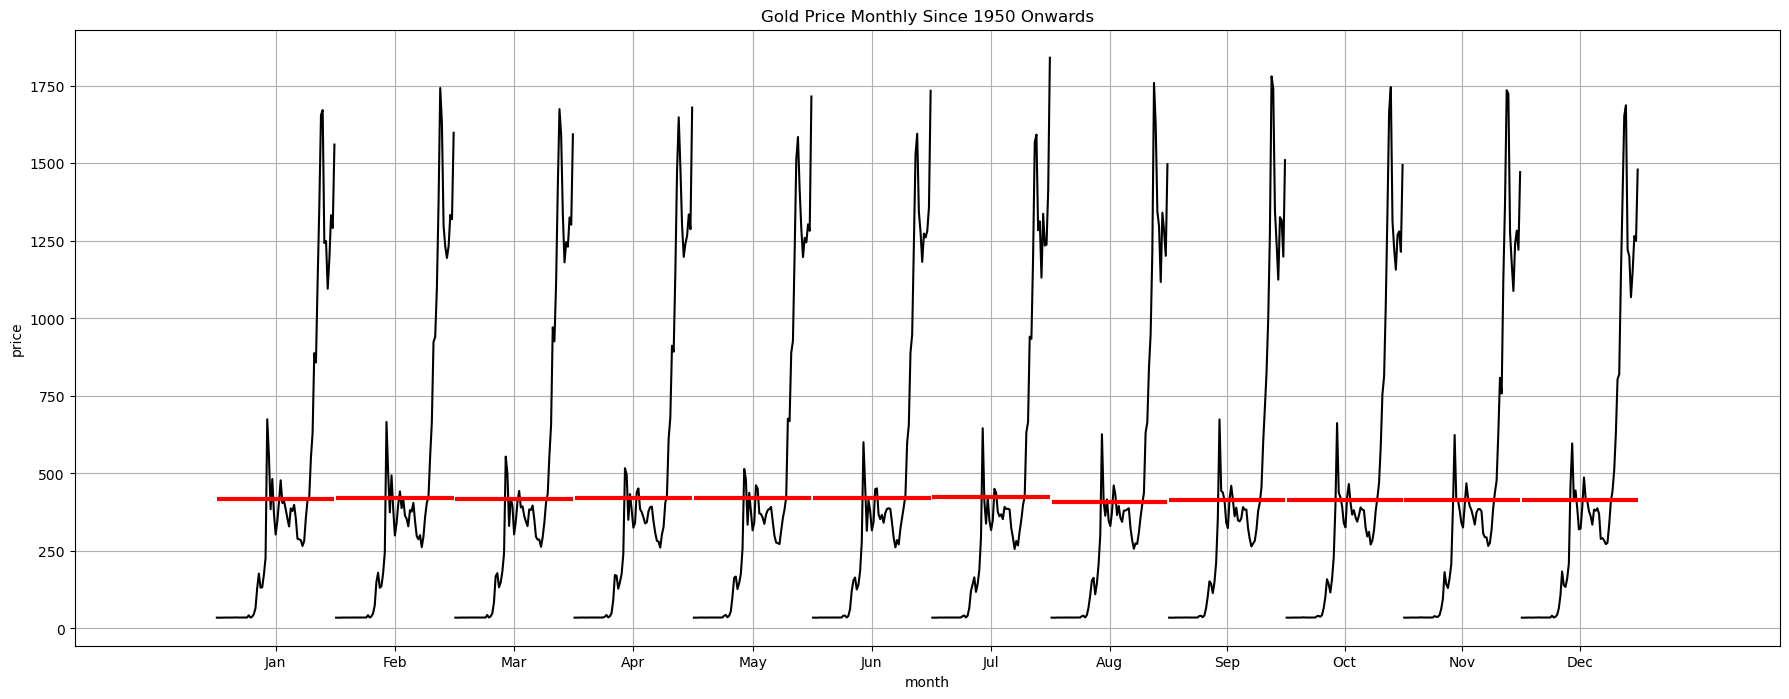

In [10]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))
month_plot(df,ylabel = 'gold price',ax = ax)
plt.title('Gold Price Monthly Since 1950 Onwards')
plt.xlabel('month')
plt.ylabel('price')
plt.grid();

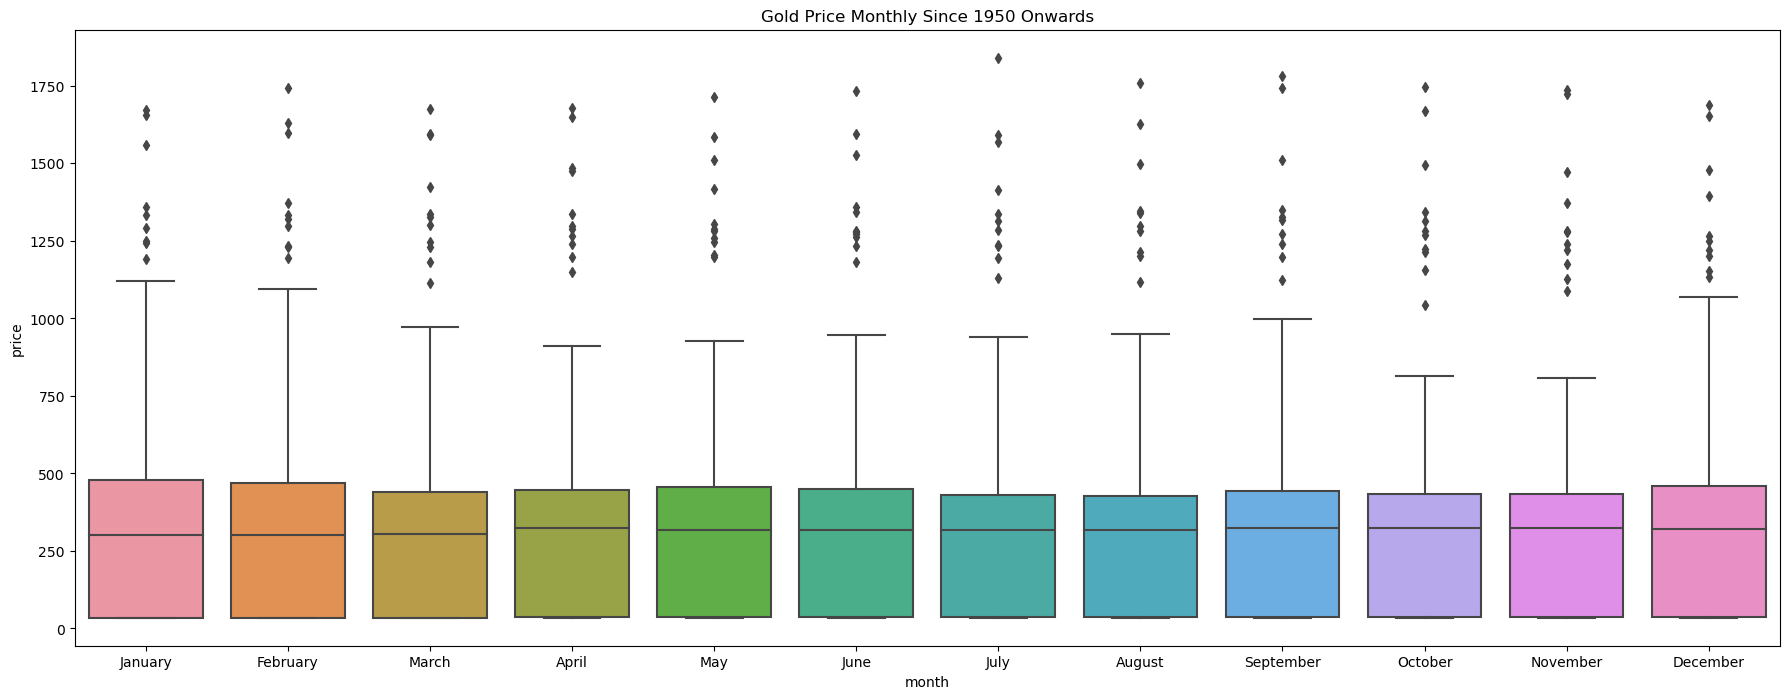

In [11]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(), y = df.values[:,0], ax = ax)
plt.title('Gold Price Monthly Since 1950 Onwards')
plt.xlabel('month')
plt.ylabel('price')
plt.show();

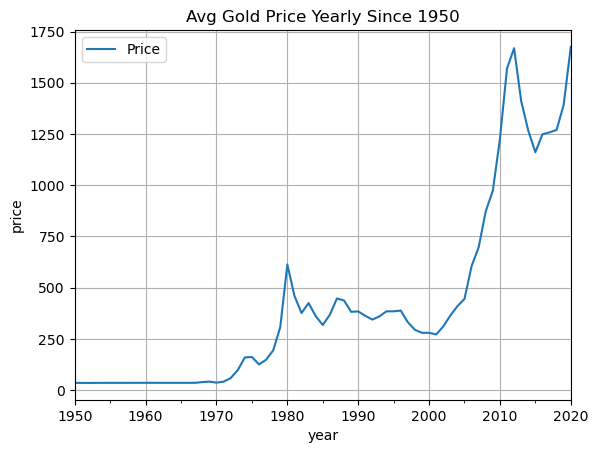

In [12]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot();
plt.title('Avg Gold Price Yearly Since 1950')
plt.xlabel('year')
plt.ylabel('price')
plt.grid();

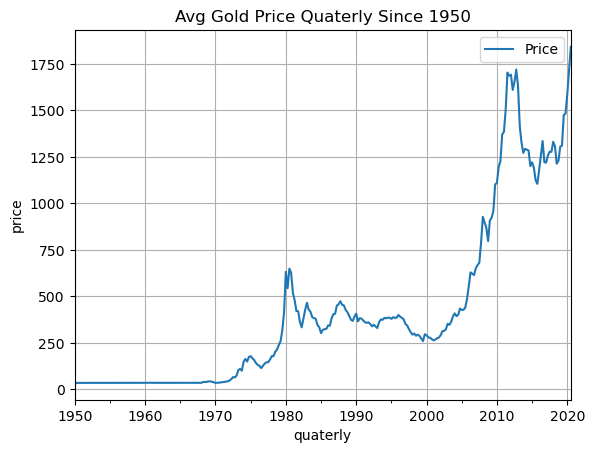

In [13]:
df_quaterly_sum = df.resample('Q').mean()
df_quaterly_sum.plot();
plt.title('Avg Gold Price Quaterly Since 1950')
plt.xlabel('quaterly')
plt.ylabel('price')
plt.grid();


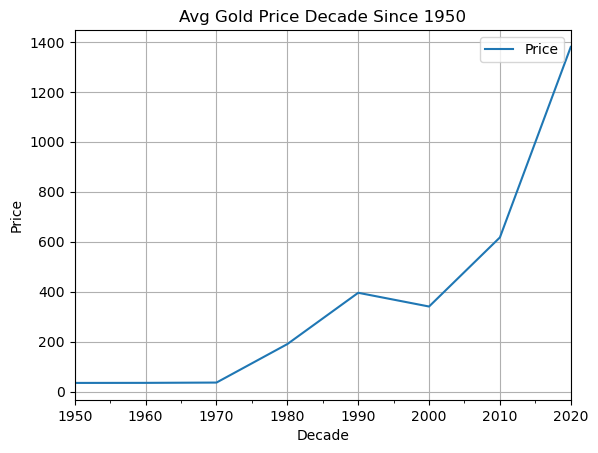

In [14]:
df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot();
plt.title('Avg Gold Price Decade Since 1950')
plt.xlabel('Decade')
plt.ylabel('Price')
plt.grid();

In [16]:
df_1.rename(column= {})
df_1 = df.groupby(df.index.year).mean().rename(columns = {'price_x':'Mean'},inplace=True)
df_1 = df_1.merge (df.groupby(df.index.year).std().rename(columns = {'price_y': 'Std'}), left_index = True, right_index = True, inplace)
df_1.head()

AttributeError: 'NoneType' object has no attribute 'merge'